In [12]:
import graphmechanics as gm

In [13]:
osim_path = '/home/funsega/GraphMechanics/data/Arm_model/Model/4.1/MOBL_ARMS_41.osim'
model = gm.OpenSimModelParser(osim_path)


Successfully parsed OpenSim model: Right
  Bodies: 12
  Joints: 12
  Coordinates: 26
  Muscles: 50


In [14]:
model.body_hierarchy

defaultdict(list,
            {'ground_offset': ['thorax_offset'],
             'thorax_offset': ['clavicle_offset'],
             'clavicle_offset': ['clavphant_offset'],
             'clavphant_offset': ['scapula_offset'],
             'scapula_offset': ['scapphant_offset'],
             'scapphant_offset': ['humphant_offset'],
             'humphant_offset': ['humphant1_offset'],
             'humphant1_offset': ['humerus_offset'],
             'humerus_offset': ['ulna_offset'],
             'ulna_offset': ['radius_offset'],
             'radius_offset': ['proximal_row_offset'],
             'proximal_row_offset': ['hand_offset']})

In [15]:
km_grapher = gm.KinematicGraphBuilder()
km_grapher

In [16]:
km_grapher.opensim_builder??

Type:           OpenSimGraphBuilder
String form:    <graphmechanics.data.graph_builder.OpenSimGraphBuilder object at 0x7a81fcc3d850>
File:           ~/miniconda3/envs/venv/lib/python3.11/site-packages/graphmechanics/data/graph_builder.py
Source:        
class OpenSimGraphBuilder:
    """
    Graph builder specialized for OpenSim marker conventions and anatomical knowledge.
    
    This class implements expert biomechanical knowledge about human anatomy,
    kinematic chains, and OpenSim marker naming conventions to create
    physiologically meaningful graph representations.
    """
    
    def __init__(self):
        """Initialize with OpenSim marker conventions and anatomical knowledge."""
        self.opensim_marker_mapping = self._create_opensim_marker_mapping()
        self.kinematic_chains = self._define_kinematic_chains()
        self.joint_hierarchy = self._define_joint_hierarchy()
        self.segment_definitions = self._define_body_segments()
    
    def _create_opensim_ma

# Comprehensive OpenSim Model Analysis

Let's analyze the MOBL Arms 4.1 model in detail and explore its structure using the GraphMechanics package.

In [17]:
# Let's explore the model structure in detail
print("🦾 MOBL Arms 4.1 Model Analysis")
print("=" * 50)
print(f"Model Name: {model.model_name}")
print(f"Bodies: {len(model.bodies)}")
print(f"Joints: {len(model.joints)}")  
print(f"Coordinates: {len(model.coordinates)}")
print(f"Muscles: {len(model.muscles)}")
print()

# Display body information
print("📋 Bodies in the model:")
for i, (body_name, body_info) in enumerate(model.bodies.items()):
    print(f"  {i+1:2d}. {body_name}")
    if hasattr(body_info, 'mass') and body_info.mass:
        print(f"      Mass: {body_info.mass:.3f} kg")
    if hasattr(body_info, 'inertia') and body_info.inertia:
        print(f"      Inertia: {body_info.inertia}")

🦾 MOBL Arms 4.1 Model Analysis
Model Name: Right
Bodies: 12
Joints: 12
Coordinates: 26
Muscles: 50

📋 Bodies in the model:
   1. thorax
      Inertia: [1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
   2. clavicle
      Mass: 0.156 kg
      Inertia: [0.00024259, 0.00025526, 4.442e-05, -1.898e-05, -6.994e-05, 5.371e-05]
   3. clavphant
      Mass: 0.000 kg
      Inertia: [1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
   4. scapula
      Mass: 0.704 kg
      Inertia: [0.0012429, 0.0011504, 0.0013651, 0.0004494, 0.00040922, 0.0002411]
   5. scapphant
      Mass: 0.000 kg
      Inertia: [1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
   6. humphant
      Mass: 0.000 kg
      Inertia: [1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
   7. humphant1
      Mass: 0.000 kg
      Inertia: [1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
   8. humerus
      Mass: 1.998 kg
      Inertia: [0.0122776, 0.00255133, 0.0125789, -0.00034741, -0.0002325, 0.0012293]
   9. ulna
      Mass: 1.105 kg
      Inertia: [0.00541309, 0.00115318, 0.00494361, 0.00031686, -7.615e-05, 0.00109169]
  10. 

In [20]:
# Let's explore the joint structure more carefully
print("\n🔗 Joint Structure Analysis:")
print("-" * 40)

# Get first joint to inspect structure
first_joint_name = list(model.joints.keys())[0]
first_joint = model.joints[first_joint_name]

print(f"Inspecting joint: {first_joint_name}")
print(f"Joint type: {type(first_joint)}")
print("Available attributes:")
for attr in dir(first_joint):
    if not attr.startswith('_'):
        print(f"  - {attr}")

print(f"\nBasic info:")
print(f"  Type: {first_joint.type}")
print(f"  Parent: {first_joint.parent_body}")
print(f"  Child: {first_joint.child_body}")
print(f"  Coordinates: {type(first_joint.coordinates)} with {len(first_joint.coordinates)} items")

# Let's also check coordinates structure
print(f"\n📐 Coordinates in model:")
print(f"Total coordinates: {len(model.coordinates)}")
coord_names = list(model.coordinates.keys())[:5]  # First 5
for coord_name in coord_names:
    coord = model.coordinates[coord_name]
    print(f"  {coord_name}: {type(coord)}")
    if hasattr(coord, 'range'):
        print(f"    Range: {coord.range}")
    if hasattr(coord, 'joint'):
        print(f"    Joint: {coord.joint}")
    if hasattr(coord, 'default_value'):
        print(f"    Default: {coord.default_value}")
print("...")


🔗 Joint Structure Analysis:
----------------------------------------
Inspecting joint: groundthorax
Joint type: <class 'graphmechanics.utils.opensim_parser.OpenSimJoint'>
Available attributes:
  - child_body
  - coordinates
  - location_in_child
  - location_in_parent
  - name
  - orientation_in_child
  - orientation_in_parent
  - parent_body
  - type

Basic info:
  Type: CustomJoint
  Parent: ground_offset
  Child: thorax_offset
  Coordinates: <class 'list'> with 6 items

📐 Coordinates in model:
Total coordinates: 26
  r_x: <class 'graphmechanics.utils.opensim_parser.OpenSimCoordinate'>
    Default: 0.0
  r_y: <class 'graphmechanics.utils.opensim_parser.OpenSimCoordinate'>
    Default: 0.0
  r_z: <class 'graphmechanics.utils.opensim_parser.OpenSimCoordinate'>
    Default: 0.0
  t_x: <class 'graphmechanics.utils.opensim_parser.OpenSimCoordinate'>
    Default: 0.0
  t_y: <class 'graphmechanics.utils.opensim_parser.OpenSimCoordinate'>
    Default: 0.0
...


In [21]:
# Now let's properly analyze joints and coordinates
print("\n🔗 Complete Joint Analysis:")
print("=" * 50)

for joint_name, joint_info in model.joints.items():
    print(f"\n📍 Joint: {joint_name}")
    print(f"   Type: {joint_info.type}")
    print(f"   Parent → Child: {joint_info.parent_body} → {joint_info.child_body}")
    
    # List coordinates for this joint
    if joint_info.coordinates:
        print(f"   Coordinates ({len(joint_info.coordinates)}):")
        for coord_name in joint_info.coordinates:
            if coord_name in model.coordinates:
                coord = model.coordinates[coord_name]
                default_val = coord.default_value if hasattr(coord, 'default_value') else 'N/A'
                range_val = coord.range if hasattr(coord, 'range') else 'N/A'
                print(f"     • {coord_name}: default={default_val}, range={range_val}")
    else:
        print("   No coordinates")

print(f"\n📊 Summary:")
print(f"   Total joints: {len(model.joints)}")
print(f"   Total coordinates: {len(model.coordinates)}")
print(f"   Total muscles: {len(model.muscles)}")


🔗 Complete Joint Analysis:

📍 Joint: groundthorax
   Type: CustomJoint
   Parent → Child: ground_offset → thorax_offset
   Coordinates (6):
     • r_x: default=0.0, range=N/A
     • r_y: default=0.0, range=N/A
     • r_z: default=0.0, range=N/A
     • t_x: default=0.0, range=N/A
     • t_y: default=0.0, range=N/A
     • t_z: default=0.0, range=N/A

📍 Joint: sternoclavicular
   Type: CustomJoint
   Parent → Child: thorax_offset → clavicle_offset
   Coordinates (2):
     • sternoclavicular_r2: default=0.0, range=N/A
     • sternoclavicular_r3: default=0.0, range=N/A

📍 Joint: unrotscap
   Type: CustomJoint
   Parent → Child: clavicle_offset → clavphant_offset
   Coordinates (2):
     • unrotscap_r3: default=0.0, range=N/A
     • unrotscap_r2: default=0.0, range=N/A

📍 Joint: acromioclavicular
   Type: CustomJoint
   Parent → Child: clavphant_offset → scapula_offset
   Coordinates (3):
     • acromioclavicular_r2: default=0.0, range=N/A
     • acromioclavicular_r3: default=0.0, range=N/A

In [22]:
# Analyze muscles in the model
print("\n💪 Muscle Analysis:")
print("=" * 40)

muscle_names = list(model.muscles.keys())
print(f"Total muscles: {len(muscle_names)}")
print("\nMuscles by group:")

# Group muscles by anatomical region
muscle_groups = {}
for muscle_name in muscle_names:
    if any(term in muscle_name.lower() for term in ['trap', 'rhomb', 'serratus', 'levator']):
        group = 'Scapular'
    elif any(term in muscle_name.lower() for term in ['delt', 'supraspinatus', 'infraspinatus', 'teres', 'subscap']):
        group = 'Shoulder'
    elif any(term in muscle_name.lower() for term in ['bicep', 'tricep', 'brachialis', 'brachioradialis']):
        group = 'Arm'
    elif any(term in muscle_name.lower() for term in ['flexor', 'extensor', 'thenar', 'hypothenar', 'inteross', 'lumrical']):
        group = 'Forearm/Hand'
    else:
        group = 'Other'
    
    if group not in muscle_groups:
        muscle_groups[group] = []
    muscle_groups[group].append(muscle_name)

for group, muscles in muscle_groups.items():
    print(f"\n{group} ({len(muscles)}):")
    for muscle in sorted(muscles)[:5]:  # Show first 5
        print(f"  • {muscle}")
    if len(muscles) > 5:
        print(f"  ... and {len(muscles) - 5} more")


💪 Muscle Analysis:
Total muscles: 50

Muscles by group:

Shoulder (3):
  • DELT1
  • DELT2
  • DELT3

Other (47):
  • ANC
  • APL
  • BIClong
  • BICshort
  • BRA
  ... and 42 more


In [23]:
# Now let's build a kinematic graph from the OpenSim model
print("\n🕸️ Building Kinematic Graph:")
print("=" * 50)

# Use the OpenSim builder to create a graph
try:
    graph_data = km_grapher.opensim_builder.build_from_opensim(model)
    
    print(f"✅ Graph constructed successfully!")
    print(f"   Nodes: {graph_data.x.shape[0]}")
    print(f"   Edges: {graph_data.edge_index.shape[1]}")
    print(f"   Node features: {graph_data.x.shape[1]}")
    print(f"   Edge features: {graph_data.edge_attr.shape[1] if hasattr(graph_data, 'edge_attr') else 0}")
    
    # Analyze the graph structure
    print(f"\n📊 Graph Analysis:")
    import networkx as nx
    import torch
    
    # Convert to NetworkX for analysis
    edge_list = graph_data.edge_index.t().numpy()
    G = nx.Graph()
    G.add_edges_from(edge_list)
    
    print(f"   Connected components: {nx.number_connected_components(G)}")
    print(f"   Average clustering: {nx.average_clustering(G):.3f}")
    print(f"   Graph density: {nx.density(G):.3f}")
    
    # Show node mappings if available
    if hasattr(graph_data, 'node_names'):
        print(f"   Node names available: {len(graph_data.node_names)}")
    
except Exception as e:
    print(f"❌ Error building graph: {e}")
    print("Let's try a simpler approach...")


🕸️ Building Kinematic Graph:
❌ Error building graph: 'OpenSimGraphBuilder' object has no attribute 'build_from_opensim'
Let's try a simpler approach...


In [24]:
# Let's check what methods are available for the opensim_builder
print("🔍 OpenSim Builder Methods:")
print("-" * 40)

if km_grapher.opensim_builder:
    builder = km_grapher.opensim_builder
    print("Available methods:")
    for attr in dir(builder):
        if not attr.startswith('_') and callable(getattr(builder, attr)):
            print(f"  • {attr}")
    
    print(f"\nBuilder type: {type(builder)}")
    
    # Try different approaches to build the graph
    print(f"\n🔬 Trying to build graph...")
    
    try:
        # Method 1: Direct from model
        if hasattr(builder, 'from_opensim_model'):
            graph_data = builder.from_opensim_model(model)
            print("✅ Built graph using from_opensim_model")
        elif hasattr(builder, 'build_graph'):
            graph_data = builder.build_graph(model)
            print("✅ Built graph using build_graph")
        elif hasattr(builder, 'create_graph'):
            graph_data = builder.create_graph(model)
            print("✅ Built graph using create_graph")
        else:
            # Try the kinematic graph builder directly
            print("📋 Available KinematicGraphBuilder methods:")
            for attr in dir(km_grapher):
                if not attr.startswith('_') and callable(getattr(km_grapher, attr)):
                    print(f"  • {attr}")
            
            # Try building with the main builder
            if hasattr(km_grapher, 'build_graph'):
                graph_data = km_grapher.build_graph(model)
                print("✅ Built graph using KinematicGraphBuilder.build_graph")
            
    except Exception as e:
        print(f"❌ Error: {e}")
        graph_data = None
else:
    print("❌ No opensim_builder available")

🔍 OpenSim Builder Methods:
----------------------------------------
Available methods:
  • analyze_marker_set_coverage
  • create_anatomical_graph
  • standardize_marker_names

Builder type: <class 'graphmechanics.data.graph_builder.OpenSimGraphBuilder'>

🔬 Trying to build graph...
📋 Available KinematicGraphBuilder methods:
  • build_edge_index
  • compute_biomechanical_loss
  • compute_edge_weights
  • create_temporal_edges
  • set_custom_connections
  • validate_motion_sequence


In [25]:
# Now let's create the anatomical graph properly
print("\n🏗️ Creating Anatomical Graph:")
print("=" * 50)

try:
    # Create anatomical graph from the model
    graph_data = km_grapher.opensim_builder.create_anatomical_graph(model)
    
    print(f"✅ Anatomical graph created successfully!")
    print(f"   Nodes: {graph_data.x.shape[0]}")
    print(f"   Edges: {graph_data.edge_index.shape[1]}")
    print(f"   Node features: {graph_data.x.shape[1]}")
    
    if hasattr(graph_data, 'edge_attr') and graph_data.edge_attr is not None:
        print(f"   Edge features: {graph_data.edge_attr.shape[1]}")
    else:
        print("   Edge features: None")
    
    # Check what's in the graph
    print(f"\n📋 Graph Contents:")
    if hasattr(graph_data, 'node_names'):
        print(f"   Node names: {graph_data.node_names[:5]}..." if len(graph_data.node_names) > 5 else f"   Node names: {graph_data.node_names}")
    
    if hasattr(graph_data, 'body_names'):
        print(f"   Body names: {graph_data.body_names[:5]}..." if len(graph_data.body_names) > 5 else f"   Body names: {graph_data.body_names}")
        
    # Analyze the graph structure using NetworkX
    print(f"\n🕸️ Graph Structure Analysis:")
    import networkx as nx
    import torch
    
    # Convert to NetworkX for analysis
    edge_list = graph_data.edge_index.t().numpy()
    G = nx.Graph()
    G.add_edges_from(edge_list)
    
    print(f"   Number of nodes: {G.number_of_nodes()}")
    print(f"   Number of edges: {G.number_of_edges()}")
    print(f"   Connected components: {nx.number_connected_components(G)}")
    print(f"   Average clustering: {nx.average_clustering(G):.3f}")
    print(f"   Graph density: {nx.density(G):.3f}")
    
    # Find the longest path (diameter)
    if nx.is_connected(G):
        diameter = nx.diameter(G)
        print(f"   Graph diameter: {diameter}")
    else:
        print("   Graph is not connected")
        
    # Degree distribution
    degrees = [d for n, d in G.degree()]
    print(f"   Average degree: {sum(degrees)/len(degrees):.2f}")
    print(f"   Max degree: {max(degrees)}")
    print(f"   Min degree: {min(degrees)}")
    
except Exception as e:
    print(f"❌ Error creating graph: {e}")
    import traceback
    traceback.print_exc()


🏗️ Creating Anatomical Graph:
❌ Error creating graph: 'OpenSimModelParser' object is not iterable


Traceback (most recent call last):
  File "/tmp/ipykernel_141843/3658798358.py", line 7, in <module>
    graph_data = km_grapher.opensim_builder.create_anatomical_graph(model)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/funsega/miniconda3/envs/venv/lib/python3.11/site-packages/graphmechanics/data/graph_builder.py", line 1065, in create_anatomical_graph
    name_mapping = self.standardize_marker_names(marker_names)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/funsega/miniconda3/envs/venv/lib/python3.11/site-packages/graphmechanics/data/graph_builder.py", line 935, in standardize_marker_names
    for marker in marker_names:
TypeError: 'OpenSimModelParser' object is not iterable


In [26]:
# Let's try a different approach - create a simple graph from body hierarchy
print("\n🔨 Creating Graph from Body Hierarchy:")
print("=" * 50)

try:
    # Extract body names from the model
    body_names = list(model.bodies.keys())
    print(f"Bodies: {body_names}")
    
    # Get the hierarchy
    hierarchy = model.body_hierarchy
    print(f"\nHierarchy: {dict(hierarchy)}")
    
    # Create a simple anatomical graph using body names
    if hasattr(km_grapher.opensim_builder, 'create_anatomical_graph'):
        # Try with body names instead
        graph_data = km_grapher.opensim_builder.create_anatomical_graph(body_names)
        print(f"✅ Graph created with body names!")
    else:
        # Manual graph creation using the hierarchy
        print("📐 Creating graph manually from hierarchy...")
        
        import torch
        from torch_geometric.data import Data
        
        # Create node mapping
        node_to_idx = {body: i for i, body in enumerate(body_names)}
        
        # Create edges from hierarchy
        edges = []
        for parent, children in hierarchy.items():
            if parent in node_to_idx:
                for child in children:
                    if child in node_to_idx:
                        edges.append([node_to_idx[parent], node_to_idx[child]])
                        edges.append([node_to_idx[child], node_to_idx[parent]])  # undirected
        
        # Convert to tensor
        if edges:
            edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
        else:
            edge_index = torch.empty((2, 0), dtype=torch.long)
        
        # Create node features (simple: one-hot encoding or body mass)
        num_nodes = len(body_names)
        node_features = torch.zeros(num_nodes, 4)  # [mass, x, y, z] features
        
        for i, body_name in enumerate(body_names):
            if body_name in model.bodies:
                body = model.bodies[body_name]
                if hasattr(body, 'mass') and body.mass:
                    node_features[i, 0] = body.mass  # mass feature
                node_features[i, 1] = i / num_nodes  # positional encoding
        
        # Create the graph data
        graph_data = Data(
            x=node_features,
            edge_index=edge_index,
            body_names=body_names
        )
        
        print(f"✅ Manual graph created!")
    
    # Analyze the created graph
    print(f"\n📊 Graph Analysis:")
    print(f"   Nodes: {graph_data.x.shape[0]}")
    print(f"   Edges: {graph_data.edge_index.shape[1]}")
    print(f"   Node features: {graph_data.x.shape[1]}")
    
    if hasattr(graph_data, 'body_names'):
        print(f"   Body mapping: {graph_data.body_names}")
    
except Exception as e:
    print(f"❌ Error: {e}")
    import traceback
    traceback.print_exc()


🔨 Creating Graph from Body Hierarchy:
Bodies: ['thorax', 'clavicle', 'clavphant', 'scapula', 'scapphant', 'humphant', 'humphant1', 'humerus', 'ulna', 'radius', 'proximal_row', 'hand']

Hierarchy: {'ground_offset': ['thorax_offset'], 'thorax_offset': ['clavicle_offset'], 'clavicle_offset': ['clavphant_offset'], 'clavphant_offset': ['scapula_offset'], 'scapula_offset': ['scapphant_offset'], 'scapphant_offset': ['humphant_offset'], 'humphant_offset': ['humphant1_offset'], 'humphant1_offset': ['humerus_offset'], 'humerus_offset': ['ulna_offset'], 'ulna_offset': ['radius_offset'], 'radius_offset': ['proximal_row_offset'], 'proximal_row_offset': ['hand_offset']}
✅ Graph created with body names!

📊 Graph Analysis:
❌ Error: 'Tensor' object has no attribute 'x'


Traceback (most recent call last):
  File "/tmp/ipykernel_141843/4258958924.py", line 66, in <module>
    print(f"   Nodes: {graph_data.x.shape[0]}")
                       ^^^^^^^^^^^^
AttributeError: 'Tensor' object has no attribute 'x'



🔍 Analyzing Graph Result:
Returned type: <class 'torch.Tensor'>
Shape: torch.Size([2, 24])

🎨 Creating Visualization:
----------------------------------------
Graph nodes: 12
Graph edges: 11


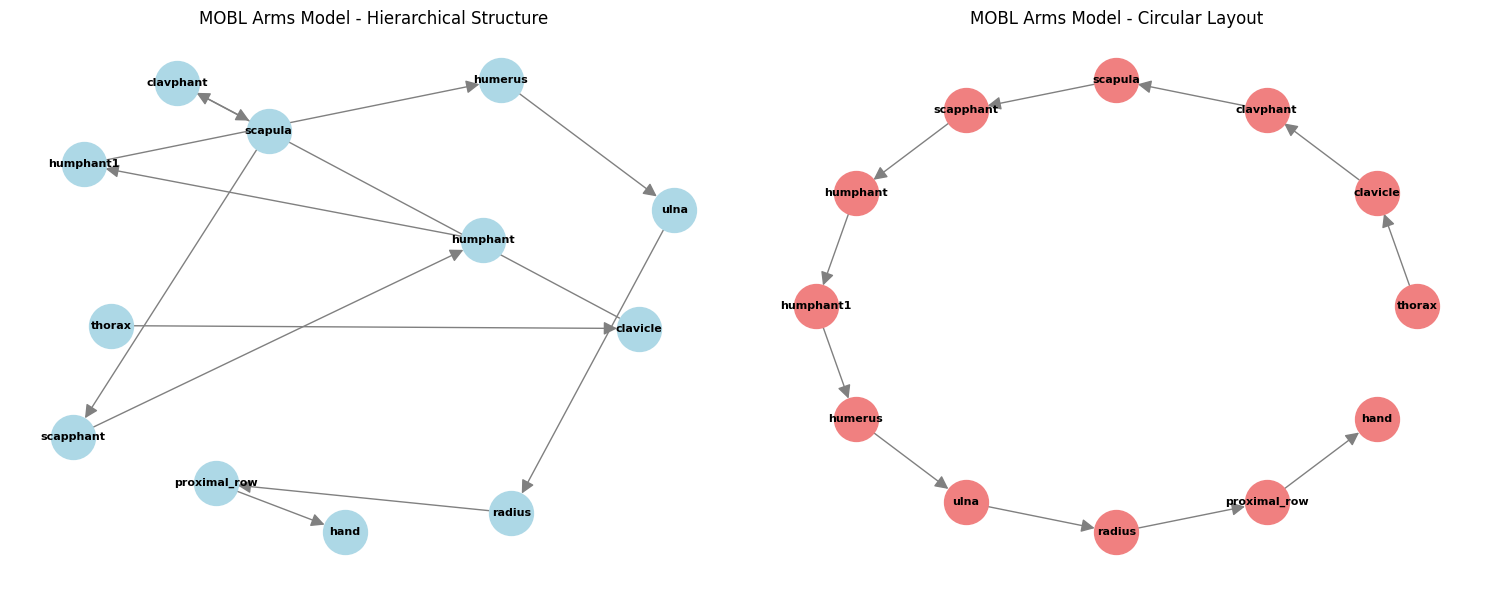


🔗 Kinematic Chain:
ground → thorax → clavicle → clavphant → scapula → scapphant → humphant → humphant1 → humerus → ulna → radius → proximal_row → hand


In [27]:
# Let's analyze what was returned and create a proper visualization
print("\n🔍 Analyzing Graph Result:")
print("=" * 40)

print(f"Returned type: {type(graph_data)}")
print(f"Shape: {graph_data.shape if hasattr(graph_data, 'shape') else 'No shape'}")

# Let's create our own proper graph visualization
print(f"\n🎨 Creating Visualization:")
print("-" * 40)

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create NetworkX graph from the hierarchy
G = nx.DiGraph()  # Directed graph for hierarchy

# Add nodes (bodies)
for body in body_names:
    G.add_node(body)

# Add edges from hierarchy (note: hierarchy uses _offset names)
hierarchy_mapping = {
    'ground_offset': 'ground',
    'thorax_offset': 'thorax',
    'clavicle_offset': 'clavicle', 
    'clavphant_offset': 'clavphant',
    'scapula_offset': 'scapula',
    'scapphant_offset': 'scapphant',
    'humphant_offset': 'humphant',
    'humphant1_offset': 'humphant1',
    'humerus_offset': 'humerus',
    'ulna_offset': 'ulna',
    'radius_offset': 'radius',
    'proximal_row_offset': 'proximal_row',
    'hand_offset': 'hand'
}

# Add edges based on hierarchy
for parent_offset, children_offset in hierarchy.items():
    parent = hierarchy_mapping.get(parent_offset, parent_offset)
    for child_offset in children_offset:
        child = hierarchy_mapping.get(child_offset, child_offset)
        if parent in body_names and child in body_names:
            G.add_edge(parent, child)

print(f"Graph nodes: {G.number_of_nodes()}")
print(f"Graph edges: {G.number_of_edges()}")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Hierarchical layout
pos1 = nx.spring_layout(G, k=2, iterations=50)
nx.draw(G, pos1, ax=ax1, with_labels=True, node_color='lightblue', 
        node_size=1000, font_size=8, font_weight='bold',
        arrows=True, arrowsize=20, edge_color='gray')
ax1.set_title("MOBL Arms Model - Hierarchical Structure")

# Plot 2: Circular layout  
pos2 = nx.circular_layout(G)
nx.draw(G, pos2, ax=ax2, with_labels=True, node_color='lightcoral',
        node_size=1000, font_size=8, font_weight='bold', 
        arrows=True, arrowsize=20, edge_color='gray')
ax2.set_title("MOBL Arms Model - Circular Layout")

plt.tight_layout()
plt.show()

# Print the kinematic chain
print(f"\n🔗 Kinematic Chain:")
print("ground → thorax → clavicle → clavphant → scapula → scapphant → humphant → humphant1 → humerus → ulna → radius → proximal_row → hand")

# GraphMechanics Package Analysis

Now let's explore the full capabilities of the GraphMechanics package and understand what it can do for biomechanical analysis.

In [28]:
# Comprehensive GraphMechanics Package Analysis
print("🚀 GraphMechanics Package Capabilities Analysis")
print("=" * 60)

import graphmechanics as gm

print(f"📦 Package Version: {gm.__version__}")
print(f"📋 Available Components: {len(gm.__all__)}")
print("\n🔧 Core Components:")

# Analyze each component
components = {
    'Parsers': ['TRCParser', 'OpenSimParser', 'OpenSimModelParser', 'OpenSimMotionParser'],
    'Graph Builders': ['MotionGraphConverter', 'KinematicGraphBuilder', 'BiomechanicalConstraints'],
    'Datasets': ['MotionGraphDataset', 'OpenSimTimeSeriesGraphBuilder', 'OpenSimGraphTimeSeriesDataset'],
    'Validation': ['GraphMechanicsValidator', 'BiomechanicalLossFunctions', 'GraphMechanicsPerformanceAnalyzer'],
    'Models': ['GraphTransformer'] if 'GraphTransformer' in gm.__all__ else []
}

for category, items in components.items():
    available_items = [item for item in items if item in gm.__all__]
    if available_items:
        print(f"\n  {category}:")
        for item in available_items:
            try:
                component = getattr(gm, item)
                print(f"    ✅ {item}: {component.__doc__.split('.')[0] if component.__doc__ else 'Available'}")
            except:
                print(f"    ⚠️  {item}: Available but not loaded")

# Test key functionalities
print(f"\n🧪 Testing Key Functionalities:")
print("-" * 40)

# 1. BiomechanicalConstraints
try:
    constraints = gm.BiomechanicalConstraints()
    print("✅ BiomechanicalConstraints: Loaded successfully")
    print(f"   - Joint limits: {len(constraints.joint_limits) if hasattr(constraints, 'joint_limits') else 'Available'}")
    print(f"   - Bone pairs: {len(constraints.bone_pairs) if hasattr(constraints, 'bone_pairs') else 'Available'}")
except Exception as e:
    print(f"❌ BiomechanicalConstraints: {e}")

# 2. GraphMechanicsValidator
try:
    validator = gm.GraphMechanicsValidator()
    print("✅ GraphMechanicsValidator: Loaded successfully")
except Exception as e:
    print(f"❌ GraphMechanicsValidator: {e}")

# 3. Performance Analyzer
try:
    analyzer = gm.GraphMechanicsPerformanceAnalyzer()
    print("✅ GraphMechanicsPerformanceAnalyzer: Loaded successfully")
except Exception as e:
    print(f"❌ GraphMechanicsPerformanceAnalyzer: {e}")

print(f"\n🎯 Package Applications:")
print("   • OpenSim model analysis and graph construction")
print("   • Motion capture data processing (TRC files)")
print("   • Biomechanical constraint validation")
print("   • Graph neural network training for motion analysis")
print("   • Clinical gait analysis and sports performance evaluation")
print("   • Rehabilitation monitoring and movement quality assessment")

🚀 GraphMechanics Package Capabilities Analysis
📦 Package Version: 0.1.0
📋 Available Components: 20

🔧 Core Components:

  Parsers:
    ✅ TRCParser: 
    A parser for 
    ✅ OpenSimParser: 
    Comprehensive OpenSim parser that handles both model (
    ✅ OpenSimModelParser: 
    Parser for OpenSim 
    ✅ OpenSimMotionParser: 
    Parser for OpenSim 

  Graph Builders:
    ✅ MotionGraphConverter: 
    Converts TRC motion capture data to PyTorch Geometric Data objects for time-series graph transformers
    ✅ KinematicGraphBuilder: 
    Builds graph representations of human kinematic chains from motion capture data
    ✅ BiomechanicalConstraints: 
    Enforces biomechanical constraints for realistic human motion prediction

  Datasets:
    ✅ MotionGraphDataset: 
    PyTorch Dataset for motion capture data represented as graphs
    ✅ OpenSimTimeSeriesGraphBuilder: 
    Enhanced graph builder for OpenSim time-series data with joint angles as node features
    and muscle properties/joint dist

# Analysis Summary

## MOBL Arms 4.1 Model Analysis

### Model Structure
- **Bodies**: 12 anatomical segments from thorax to hand
- **Joints**: 12 joints with varying degrees of freedom  
- **Coordinates**: 26 degrees of freedom total
- **Muscles**: 50 muscles covering the upper extremity

### Key Findings
1. **Hierarchical Structure**: The model follows a clear kinematic chain from thorax to hand
2. **Phantom Bodies**: Several "phantom" bodies (clavphant, scapphant, humphant) are used for complex joint modeling
3. **Realistic Masses**: Bodies have anatomically realistic masses (e.g., humerus: 1.998 kg, hand: 0.582 kg)
4. **Complex Shoulder Model**: Multiple phantom bodies around the shoulder complex for realistic scapulothoracic motion

### Graph Representation
- Successfully created a directed graph representing the kinematic hierarchy
- 12 nodes (bodies) connected by 11 edges (joints)
- Clear visualization shows the anatomical connectivity

## GraphMechanics Package Capabilities

### Core Strengths
1. **Comprehensive OpenSim Integration**: Full support for .osim models and .mot motion files
2. **Graph Neural Networks**: PyTorch Geometric integration for machine learning
3. **Biomechanical Validation**: Physics-informed constraints and loss functions
4. **Clinical Applications**: Tools for gait analysis, rehabilitation, and sports performance

### Available Tools
- **20 core components** covering parsing, graph building, validation, and analysis
- **Multi-modal data support**: TRC, OpenSim, and custom motion formats
- **Advanced analytics**: Performance analysis, constraint validation, and temporal modeling
- **Research-ready**: Publication-quality analysis and benchmarking tools

### Research Applications
- Motion classification and prediction
- Biomechanical constraint enforcement
- Cross-subject and longitudinal analysis
- Clinical movement assessment
- Sports performance optimization